<a href="https://colab.research.google.com/github/PraeJi/Deep-Learning-for-Image/blob/main/Basic_Deep_Learning(Keras%2CTensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

#EX1. สร้าง model ในการหา "ค่าเฉลี่ย" จากชุดตัวเลขเป็นจำนวนเต็มบวกชุดละ 6 ตัว

## สร้าง Dataset

In [3]:
# สร้าง Dataset

import numpy as np
import random

result = np.random.randint(100,size=(10000,6))/100 #10 ชุด ชุดละ 6 ตัว, หาร 100 เพื่อไม่ให้เยอะเกินไป
print(result)

[[0.61 0.95 0.9  0.61 0.63 0.74]
 [0.84 0.79 0.74 0.82 0.8  0.65]
 [0.21 0.93 0.94 0.27 0.32 0.19]
 ...
 [0.72 0.94 0.2  0.1  0.03 0.36]
 [0.26 0.82 0.4  0.54 0.46 0.82]
 [0.03 0.95 0.73 0.38 0.24 0.64]]


##split dataset => train,val,test


In [4]:
# split dataset => train,val,test

train = np.random.randint(100,size=(10000,6)) / 100
val = np.random.randint(100,size=(10000,6)) / 100
test = np.random.randint(100,size=(10000,6)) /100

## ทำชุดเฉลย (Label)


In [5]:
# ทำชุดเฉลย (Label)

train_ans = train.mean(axis=1) #axis คือ มิติที่1
val_ans = val.mean(axis=1)
test_ans = test.mean(axis=1)

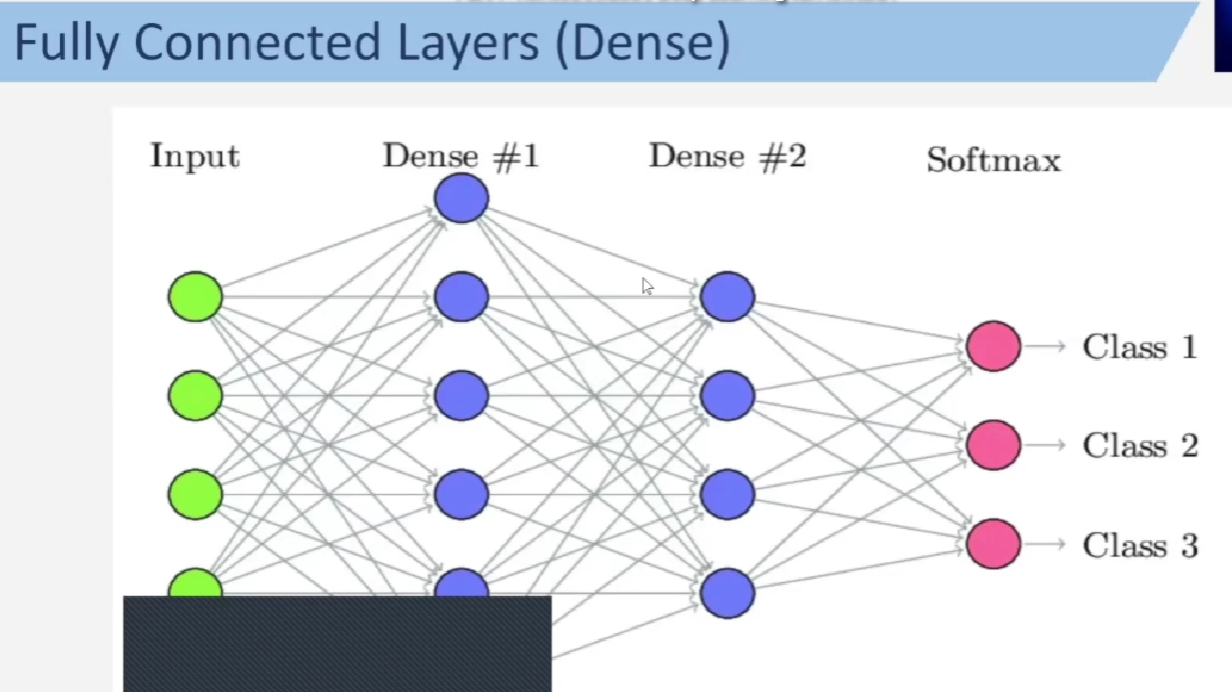

## สร้าง Model แบบ Sequential และใช้ Dense Layer มาเป็นเซลล์ประสาทเทียม

In [6]:
# Create Model

model = Sequential()
model.add(Dense(8,input_shape=(6,))) #Hidden layer1 8 คือจำนวน node
model.add(Dense(8)) #Hidden layer2
model.add(Dense(1)) #Hidden layer3 #1 คือ output 1 ซึ่งเป็นค่าเฉลี่ยมีได้ค่าเดียว

model.summary()

'''
Note:
- จำนวน Dense มีผลต่อประสิทธิภาพของโมเดล
- จำนวน node ในแต่ละ dense ยิ่งเยอะยิ่งดี แต่เทรนเยอะ
- Dense ชั้นสุดท้าย จำนวน node จะเท่ากับจำนวน output เช่น จากโจทย์หาค่าเฉลี่ย ดังนั้นผลลัพธ์จะมีค่าเดียว
ส่วน dense ชั้นอื่นใส่กี่ node ก็ได้ โดยจะเท่ากันหรือไม่ก็ได้
'''

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

'\nNote:\n- จำนวน Dense มีผลต่อประสิทธิภาพของโมเดล\n- จำนวน node ในแต่ละ dense ยิ่งเยอะยิ่งดี แต่เทรนเยอะ\n- Dense ชั้นสุดท้าย จำนวน node จะเท่ากับจำนวน output เช่น จากโจทย์หาค่าเฉลี่ย ดังนั้นผลลัพธ์จะมีค่าเดียว\nส่วน dense ชั้นอื่นใส่กี่ node ก็ได้ โดยจะเท่ากันหรือไม่ก็ได้\n'

##Train Model ด้วยวิธีการ Supervise Learning

In [7]:
# Train

model.compile(loss='mse',optimizer=tf.keras.optimizers.SGD())
model.fit(
    x = train,
    y = train_ans,
    epochs = 100, #จำนวนรอบ ว่าจะเทรนโมเดลกี่รอบ
    batch_size = 100, #จำนวนชุด data ที่จะเอาไปให้ model เห็น แล้วค่อยปรับประสิทธิภาพ
    validation_batch_size=100
)

'''
Note:
- mse (mean squared error) จะนำค่าที่เป็นคำตอบที่แท้จริงมาเทียบกับค่าที่ AI ตอบ เช่น ans=50,AI=49,50-49=1 แสดงว่าดี
- เลือกใช้ Optimozer เป็น SGD ซึ่งเป็นฟังก์ชันทางคณิตที่สามารถปรับค่า loss ให้ต่ำลงได้
- ถ้าค่า loss ลดลง แสดงว่า model ฉลาดขึ้น
- จำนวน batch_size จะมีผลต่อ ram ไม่ควรใส่เยอะ
'''

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0637
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011
Epoch 13/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4376e-04
Epoch 14/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7266e-04
Epoch 15/100
100/100 ━━━━━━━━━━━━━━

'\nNote:\n- mse (mean squared error) จะนำค่าที่เป็นคำตอบที่แท้จริงมาเทียบกับค่าที่ AI ตอบ เช่น ans=50,AI=49,50-49=1 แสดงว่าดี\n- เลือกใช้ Optimozer เป็น SGD ซึ่งเป็นฟังก์ชันทางคณิตที่สามารถปรับค่า loss ให้ต่ำลงได้\n- ถ้าค่า loss ลดลง แสดงว่า model ฉลาดขึ้น\n- จำนวน batch_size จะมีผลต่อ ram ไม่ควรใส่เยอะ\n'

##Evaluation Test


In [8]:
# Evaluation Test

pred = model.predict(test)
print(pred[:3])
print(test_ans[:3])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.3533307]
 [0.6033404]
 [0.5000014]]
[0.35333333 0.60333333 0.5       ]


# EX2. ให้สร้าง model ทำนายเลขในลำดับถัดไป โดยทำนายจากชุดตัวเลข 5 ตัว (ชุดตัวเลขเป็นเลขลำดับการคูณ)

[1,2,4,8,16] => 32


## Create Dataset and Split Data

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

def multiplication_dataset(num_sequences, sequence_length, test_size=0.2, val_size=0.1):
  X = []
  y = []
  for _ in range(num_sequences):
    start = np.random.randint(1, 10)
    sequence = [start * (2 ** i) for i in range(sequence_length)]
    X.append(sequence[:-1])
    y.append(sequence[-1])
  X = np.array(X)
  y = np.array(y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size / (1 - test_size))
  return X_train, X_val, X_test, y_train, y_val, y_test

# สร้างและ split dataset
X_train, X_val, X_test, y_train, y_val, y_test = multiplication_dataset(1000, 6)

In [10]:
X_train = X_train/100
X_val = X_val/100
y_train = y_train/100
y_val = y_val/100

In [11]:
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

Training set size: (700, 5)
Validation set size: (100, 5)
Testing set size: (200, 5)


x = ตัวแปรต้น
 y = ตัวแปรตาม (คำตอบ)

In [12]:
print(X_train[1])
print(y_train[1])

'''
2*(2**0) =2
2*(2**1) =4
2*(2**2) =8
2*(2**3) =16
2*(2**4) =32
2*(2**5) =64
'''

[0.07 0.14 0.28 0.56 1.12]
2.24


'\n2*(2**0) =2\n2*(2**1) =4\n2*(2**2) =8\n2*(2**3) =16\n2*(2**4) =32\n2*(2**5) =64\n'

## Create Model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [14]:
print("Shape of X_train:", X_train.shape[1])

Shape of X_train: 5


In [25]:
# Create Model

model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],))) #Hidden layer1 8 คือจำนวน node
model.add(Dense(16)) #Hidden layer2
model.add(Dense(16))
model.add(Dense(16))
model.add(Dense(16))
model.add(Dense(16))
model.add(Dense(1)) #Hidden layer3 #1 คือ output 1 ซึ่งเป็นค่าเฉลี่ยมีได้ค่าเดียว

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [26]:
# Train

model.compile(loss='mse',optimizer=tf.keras.optimizers.SGD())
history = model.fit(
    x = X_train,
    y = y_train,
    epochs = 100, #จำนวนรอบ ว่าจะเทรนโมเดลกี่รอบ
    batch_size = 100, #จำนวนชุด data ที่จะเอาไปให้ model เห็น แล้วค่อยปรับประสิทธิภาพ
    validation_data=(X_val, y_val)
    #validation_batch_size=100
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.1825 - val_loss: 0.1298
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1125 - val_loss: 0.0711
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0645 - val_loss: 0.0370
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0313 - val_loss: 0.0180
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0083
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - val_loss: 0.0037
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - val_loss: 6.9590e-04
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4355e-04 - val_loss: 2.6739e-04
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0630e-04 - val_loss: 1.0739e-04
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5540e-05 - val_loss: 4.2985e-05
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

## Evalution Test

In [27]:
# Evaluation Test

pred = model.predict(X_test)

print(X_test[:5])
print(pred[:5])
print(y_test[:5])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[  6  12  24  48  96]
 [  9  18  36  72 144]
 [  6  12  24  48  96]
 [  2   4   8  16  32]
 [  4   8  16  32  64]]
[[191.99997]
 [287.99997]
 [191.99997]
 [ 64.     ]
 [127.99999]]
[192 288 192  64 128]


In [29]:
pred = model.predict(np.array([[3,6,12,24,48]]))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[96.]]
